# CDFs for GlobSnow and NoahMP SWE datasets
GlobSnow SWE date range: 2000-2016 <br>
NoahMP SWE date range: Oct 2009-Sept 2016

In [6]:
import xarray as xr
import os
import matplotlib.pyplot as plt
import numpy as np
import rasterio
from rasterio.plot import show
from osgeo import gdal
import seaborn as sns

C:\Users\vicki\Anaconda3\lib\site-packages\distributed\config.py:63: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  config.update(yaml.load(text))


In [7]:
import matplotlib.pyplot as plt
from osgeo import gdal

# Test on ECMW, GDAS, GlobSnow SWE data, clipped to CLPX in GEE. Exported. 
filepath1 = r"C:\Users\vicki\gee-swe-plots\NoahMP_ecmw_SWE_Quebec_5km_month01.tif"
filepath2 = r"C:\Users\vicki\gee-swe-plots\NoahMP_gdas_SWE_Quebec_5km_month02.tif"
filepath3 = r"C:\Users\vicki\gee-swe-plots\GlobSnow_SWE_Quebec_5km_month02.tif"

# Open the file.
raster1 = gdal.Open(filepath1)
raster2 = gdal.Open(filepath2)
raster3 = gdal.Open(filepath3)

In [8]:
# Read raster data as numeric array from GDAL Dataset.
rasterArray1 = raster1.ReadAsArray()
rasterArray2 = raster2.ReadAsArray()
rasterArray3 = raster3.ReadAsArray()

# use flatten to take a 2-D array and turn it into a 1-D array.
flattened_raster_data1 = rasterArray1.flatten()
flattened_raster_data2 = rasterArray2.flatten()
flattened_raster_data3 = rasterArray3.flatten()

C:\Users\vicki\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\vicki\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0, 0.5, 'Pixel Count')

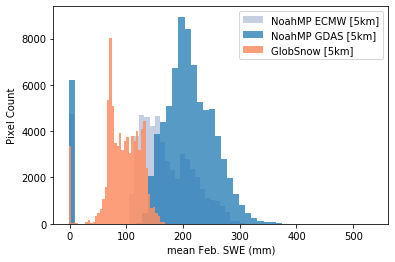

In [9]:
# plot histograms.
plt.hist(flattened_raster_data1, bins=50, label='NoahMP ECMW [5km]', color='#8da0cb', alpha=0.5)
plt.hist(flattened_raster_data2, bins=50, label='NoahMP GDAS [5km]', color='#1f78b4',  alpha=0.75)
plt.hist(flattened_raster_data3, bins=40, label='GlobSnow [5km]', color='#fc8d62',  alpha=0.85)
plt.legend(loc='upper right')
# plt.xlim(xmin=1, xmax = 550)
# plt.ylim(ymin=0, ymax = 350)

plt.xlabel('mean Feb. SWE (mm)')
plt.ylabel('Pixel Count')

In [10]:
# there's a lot of 0's. Let's treat 0's as nans. 

x1 = flattened_raster_data1[~np.isnan(flattened_raster_data1)]
x2 = flattened_raster_data2[~np.isnan(flattened_raster_data2)]
x3 = flattened_raster_data3[~np.isnan(flattened_raster_data3)]

# code to replace all negative value with 0 
# flattened_raster_data4[flattened_raster_data4 < 0] = 0
  
# printing result 
print("New resulting array: ", x1)

New resulting array:  [133.57486801 130.74942938 128.04266276 ... 174.20463547 170.99278274
 164.56295218]


Text(0, 0.5, 'Pixel Count')

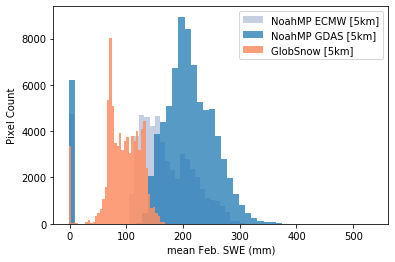

In [11]:
# plot histograms again. 
plt.hist(x1, bins=50, label='NoahMP ECMW [5km]', color='#8da0cb', alpha=0.5)
plt.hist(x2, bins=50, label='NoahMP GDAS [5km]', color='#1f78b4',  alpha=0.75)
plt.hist(x3, bins=40, label='GlobSnow [5km]', color='#fc8d62',  alpha=0.85)
plt.legend(loc='upper right')
# plt.xlim(xmin=1, xmax = 550)
# plt.ylim(ymin=0, ymax = 350)

plt.xlabel('mean Feb. SWE (mm)')
plt.ylabel('Pixel Count')

soo.. that didn't do it. Let's try a different route. 

Text(0, 0.5, 'Cumulative Fraction of Area')

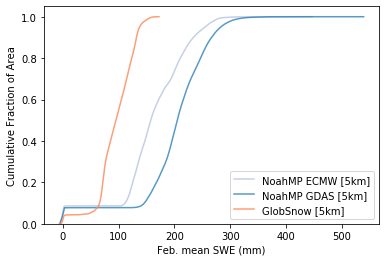

In [12]:
# Smooth out the lines
fig = sns.kdeplot(x1, cumulative=True, bw=1.5, label='NoahMP ECMW [5km]', color='#8da0cb', alpha=0.5)
fig = sns.kdeplot(x2, cumulative=True, bw=1.5, label='NoahMP GDAS [5km]', color='#1f78b4',  alpha=0.75)
fig = sns.kdeplot(x3, cumulative=True, bw=1.5, label='GlobSnow [5km]', color='#fc8d62',  alpha=0.85)

# fig.figure.suptitle("Plot", fontsize = 24)
plt.legend(loc='lower right')
# plt.xlim(1,100)
plt.xlabel('Feb. mean SWE (mm)')
plt.ylabel('Cumulative Fraction of Area')

Text(0.5, 0, 'mean Feb. SWE (mm)')

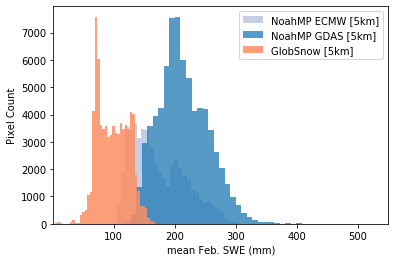

In [14]:
# damn, hella 0s. Let's just leave those out..and see what that looks like
t1 = x1[x1>0]
t2 = x2[x2>0]
t3 = x3[x3>0]

# plot histograms.
plt.hist(t1, bins=50, label='NoahMP ECMW [5km]', color='#8da0cb', alpha=0.5)
plt.hist(t2, bins=50, label='NoahMP GDAS [5km]', color='#1f78b4',  alpha=0.75)
plt.hist(t3, bins=40, label='GlobSnow [5km]', color='#fc8d62',  alpha=0.85)

# plot legend.
plt.legend(loc='upper right')
plt.xlim(xmin=1, xmax = 550)
# plt.ylim(ymin=1, ymax = 1000)
plt.ylabel('Pixel Count')
plt.xlabel('mean Feb. SWE (mm)')

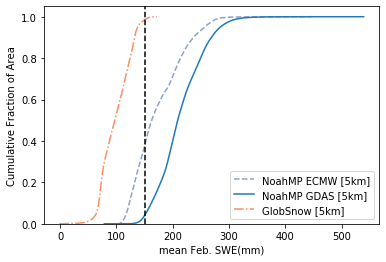

In [17]:
# let's do this again then, without 0s 
# sns.kdeplot(t1, cumulative=True, bw=1.5, label='NoahMP ECMW [5km]', color='#1f78b4', linestyle= '--')
# sns.kdeplot(t2, cumulative=True, bw=1.5, label='NoahMP GDAS [5km]', color='#1f78b4')
# sns.kdeplot(t3, cumulative=True, bw=1.5, label='GlobSnow [5km]', color='#1f78b4', linestyle= '-.')

sns.kdeplot(t1, cumulative=True, bw=1.5, label='NoahMP ECMW [5km]', color='#8da0cb', linestyle= '--')
sns.kdeplot(t2, cumulative=True, bw=1.5, label='NoahMP GDAS [5km]', color='#1f78b4')
sns.kdeplot(t3, cumulative=True, bw=1.5, label='GlobSnow [5km]', color='#fc8d62', linestyle= '-.')

# fig.figure.suptitle("Plot", fontsize = 24)
plt.legend(loc='lower right')
# plt.xlim(1,100)
plt.xlabel('mean Feb. SWE(mm)')
plt.ylabel('Cumulative Fraction of Area')
plt.axvline(x=150, color='k', linestyle='--')